<a href="https://colab.research.google.com/github/arc-1103/RADAR.Net---ML-/blob/main/Sen1Floods11_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Rasterio for handling satellite images
!pip install rasterio

In [2]:
!git clone https://github.com/cloudtostreet/Sen1Floods11.git
%cd Sen1Floods11

fatal: destination path 'Sen1Floods11' already exists and is not an empty directory.
/content/Sen1Floods11


In [3]:
!pip install rasterio -q

In [4]:
#Importing Libraries
import os
import random
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!mkdir -p /content/data/flood_events/HandLabeled/S1Hand
!mkdir -p /content/data/flood_events/HandLabeled/LabelHand

In [6]:
# Download Sentinel-1 images (VV/VH bands)
!gsutil -m rsync -r gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand /content/data/flood_events/HandLabeled/S1Hand

# Download the corresponding Ground Truth labels
!gsutil -m rsync -r gs://sen1floods11/v1.1/data/flood_events/HandLabeled/LabelHand /content/data/flood_events/HandLabeled/LabelHand


both the source and destination. Your crcmod installation isn't using the
module's C extension, so checksumming will run very slowly. If this is your
first rsync since updating gsutil, this rsync can take significantly longer than
usual. For help installing the extension, please see "gsutil help crcmod".

Building synchronization state...
Starting synchronization...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Mekong_1396181_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Mekong_1395593_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Mekong_1413877_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Mekong_254910_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Mekong_269835_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Mekong_1443339_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/H

In [7]:
!ls /content/data/flood_events/HandLabeled/S1Hand | head -n 5

Bolivia_103757_S1Hand.tif
Bolivia_129334_S1Hand.tif
Bolivia_195474_S1Hand.tif
Bolivia_23014_S1Hand.tif
Bolivia_233925_S1Hand.tif


In [8]:
def visualize_random_sample():
    # Check if directories exist
    if not os.path.exists(image_dir) or not os.path.exists(label_dir):
        print(f"Error: Could not find data at {base_path}")
        print("Did you run the download command? (gsutil -m cp ...)")
        return

    # Get list of images
    files = [f for f in os.listdir(image_dir) if f.endswith('.tif')]

    if not files:
        print("No .tif files found in the directory.")
        return

    # Pick a random file
    filename = random.choice(files)
    print(f"Displaying: {filename}")

    # Open the Image and Label
    with rasterio.open(os.path.join(image_dir, filename)) as src_img:
        # Read Band 1 (VV Polarization)
        s1_img = src_img.read(1)

    with rasterio.open(os.path.join(label_dir, filename)) as src_lbl:
        # Read Label
        label_img = src_lbl.read(1)

    # Setup Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot Sentinel-1 (VV Band)
    # We clip the values to make the contrast better (ignore extreme outliers)
    vmin, vmax = np.percentile(s1_img, [2, 98])
    im1 = ax1.imshow(s1_img, cmap='gray', vmin=vmin, vmax=vmax)
    ax1.set_title(f"Sentinel-1 (VV Band)\nDarker = Water/Flat Surface")
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    # Plot Label
    # -1 usually means 'no data', 0 is dry, 1 is water
    im2 = ax2.imshow(label_img, cmap='Blues', interpolation='nearest')
    ax2.set_title(f"Ground Truth Label\n(Blue = Water)")
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

In [9]:
#Importing Libraries
import os
import random
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import glob

In [10]:
!ls /content/data/flood_events/HandLabeled/S1Hand

Bolivia_103757_S1Hand.tif    Paraguay_153941_S1Hand.tif
Bolivia_129334_S1Hand.tif    Paraguay_172476_S1Hand.tif
Bolivia_195474_S1Hand.tif    Paraguay_179624_S1Hand.tif
Bolivia_23014_S1Hand.tif     Paraguay_191503_S1Hand.tif
Bolivia_233925_S1Hand.tif    Paraguay_198534_S1Hand.tif
Bolivia_242570_S1Hand.tif    Paraguay_205585_S1Hand.tif
Bolivia_290290_S1Hand.tif    Paraguay_212687_S1Hand.tif
Bolivia_294583_S1Hand.tif    Paraguay_215904_S1Hand.tif
Bolivia_312675_S1Hand.tif    Paraguay_224845_S1Hand.tif
Bolivia_314919_S1Hand.tif    Paraguay_225187_S1Hand.tif
Bolivia_360519_S1Hand.tif    Paraguay_232281_S1Hand.tif
Bolivia_379434_S1Hand.tif    Paraguay_24341_S1Hand.tif
Bolivia_432776_S1Hand.tif    Paraguay_246154_S1Hand.tif
Bolivia_60373_S1Hand.tif     Paraguay_247656_S1Hand.tif
Bolivia_76104_S1Hand.tif     Paraguay_252217_S1Hand.tif
Ghana_103272_S1Hand.tif      Paraguay_271769_S1Hand.tif
Ghana_1033830_S1Hand.tif     Paraguay_280900_S1Hand.tif
Ghana_1078550_S1Hand.tif     Paraguay_284928_S1Ha

Processing: Spain_7604243_S1Hand.tif


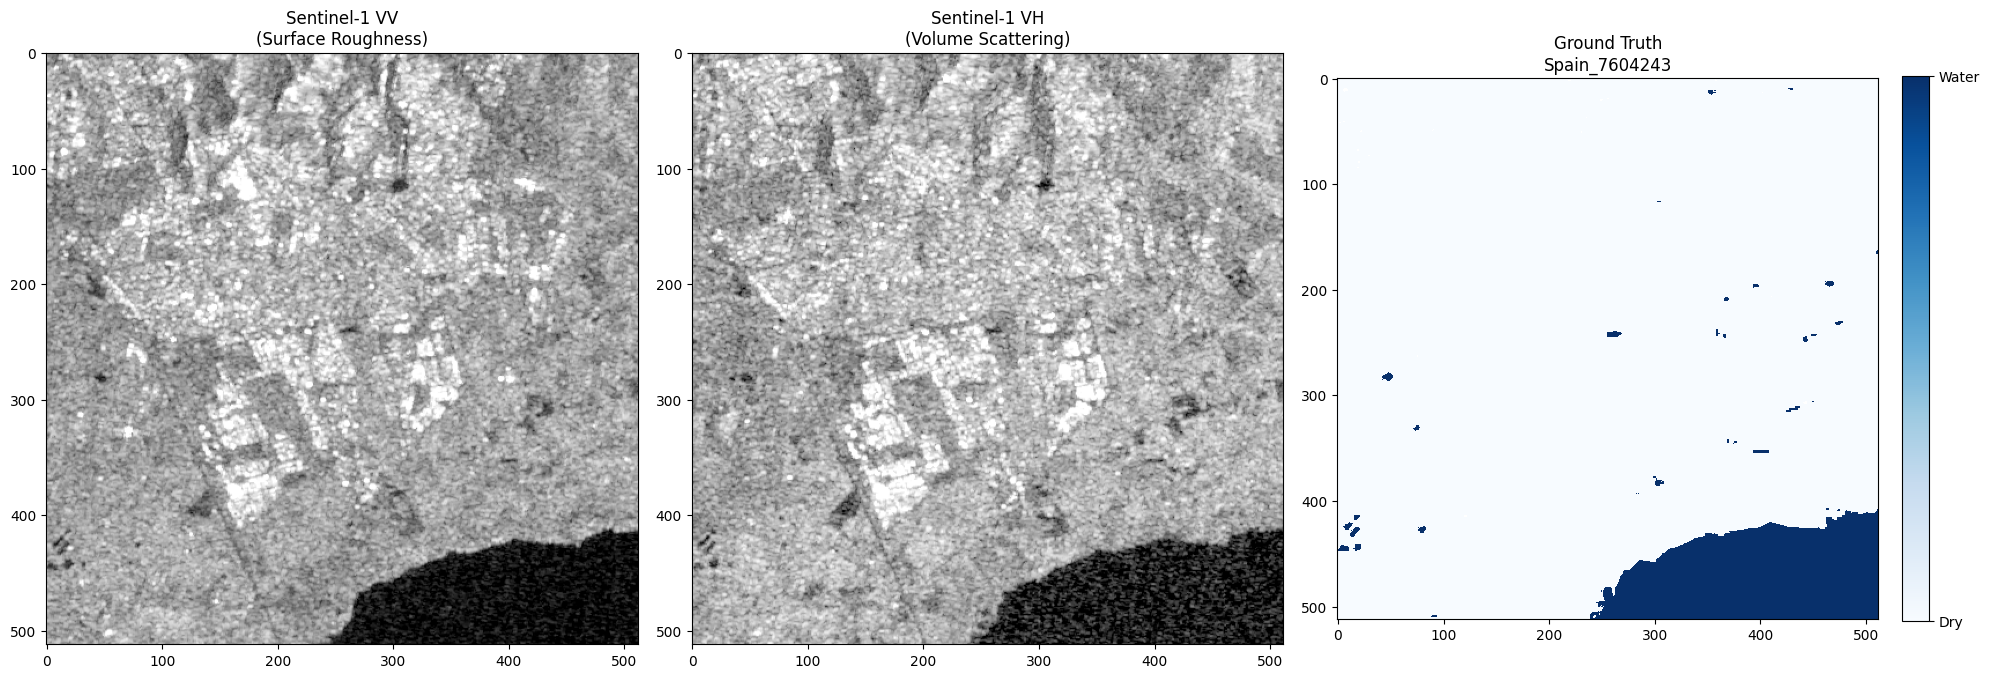

In [11]:
# 1. Define paths (using the directory we verified with 'ls')
BASE = '/content/data/flood_events/HandLabeled'
img_path = os.path.join(BASE, 'S1Hand')
lbl_path = os.path.join(BASE, 'LabelHand')

# 2. Updated Function with 3 Subplots (VV, VH, Label)
def visualize_flood_sample(image_dir, label_dir):
    img_files = set([f for f in os.listdir(image_dir) if f.endswith('.tif')])
    lbl_files = set([f.replace('_LabelHand', '_S1Hand') for f in os.listdir(label_dir) if f.endswith('.tif')])

    # Matching files based on the filenames you provided
    # The labels usually have 'LabelHand' in the name instead of 'S1Hand'
    common_names = list(img_files)
    filename = random.choice(common_names)
    label_filename = filename.replace('_S1Hand', '_LabelHand')

    print(f"Processing: {filename}")

    with rasterio.open(os.path.join(image_dir, filename)) as src:
        vv_img = src.read(1)
        vh_img = src.read(2)

    with rasterio.open(os.path.join(label_dir, label_filename)) as src_lbl:
        label_img = src_lbl.read(1)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

    # VV Plot
    vmin, vmax = np.percentile(vv_img, [2, 98])
    ax1.imshow(vv_img, cmap='gray', vmin=vmin, vmax=vmax)
    ax1.set_title("Sentinel-1 VV\n(Surface Roughness)")

    # VH Plot
    vmin_vh, vmax_vh = np.percentile(vh_img, [2, 98])
    ax2.imshow(vh_img, cmap='gray', vmin=vmin_vh, vmax=vmax_vh)
    ax2.set_title("Sentinel-1 VH\n(Volume Scattering)")

    # Ground Truth Label Plot
    # Masking -1 (No Data)
    masked_label = np.ma.masked_where(label_img == -1, label_img)
    im3 = ax3.imshow(masked_label, cmap='Blues', interpolation='nearest')
    ax3.set_title(f"Ground Truth\n{filename.split('_S1Hand')[0]}")

    # Add a legend-style colorbar
    cbar = plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04, ticks=[0, 1])
    cbar.ax.set_yticklabels(['Dry', 'Water'])

    plt.tight_layout()
    plt.show()

# 3. Execute
visualize_flood_sample(img_path, lbl_path)

In [12]:
# Create the directory
!mkdir -p /content/data/flood_events/HandLabeled/S2Hand

# Download the Sentinel-2 (Multi-spectral) images
!gsutil -m rsync -r gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S2Hand /content/data/flood_events/HandLabeled/S2Hand


both the source and destination. Your crcmod installation isn't using the
module's C extension, so checksumming will run very slowly. If this is your
first rsync since updating gsutil, this rsync can take significantly longer than
usual. For help installing the extension, please see "gsutil help crcmod".

Building synchronization state...
Starting synchronization...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S2Hand/Bolivia_23014_S2Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S2Hand/Bolivia_103757_S2Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S2Hand/Bolivia_195474_S2Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S2Hand/Bolivia_242570_S2Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S2Hand/Bolivia_294583_S2Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S2Hand/Bolivia_312675_S2Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/

Inspecting Multi-spectral file: Paraguay_1029042_S2Hand.tif


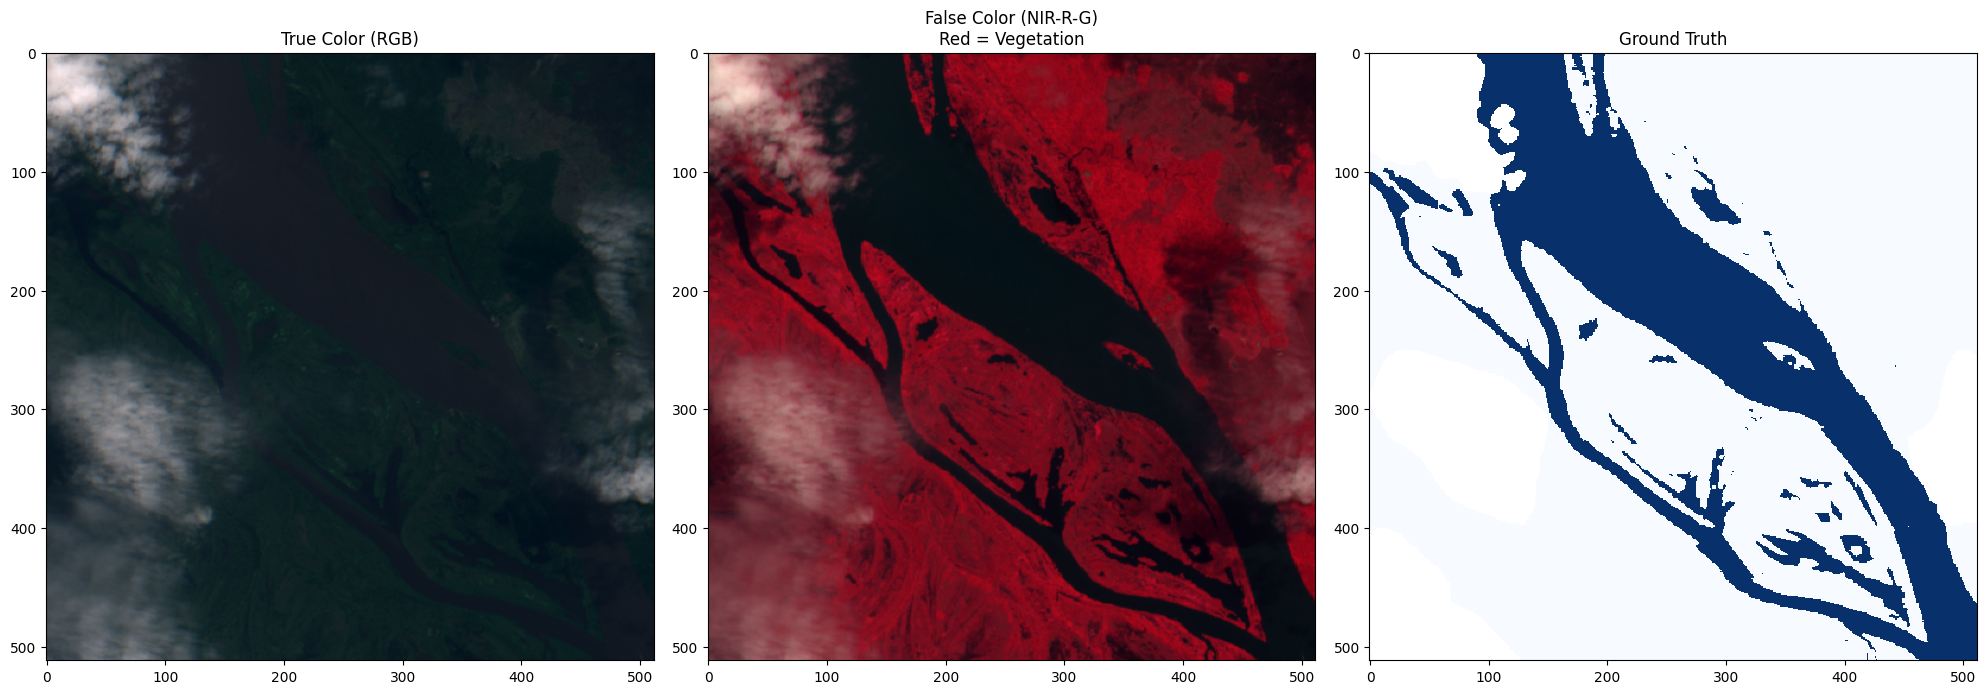

In [13]:
def visualize_multispectral_sample(s2_dir, label_dir):
    s2_files = [f for f in os.listdir(s2_dir) if f.endswith('.tif')]
    filename = random.choice(s2_files)
    label_filename = filename.replace('_S2Hand', '_LabelHand')

    print(f"Inspecting Multi-spectral file: {filename}")

    with rasterio.open(os.path.join(s2_dir, filename)) as src:
        # Sen1Floods11 S2 bands are usually ordered:
        # B1, B2, B3, B4, B5, B6, B7, B8, B8A, B9, B10, B11, B12
        # True Color: B4 (Red), B3 (Green), B2 (Blue) -> Indices 4, 3, 2
        # False Color: B8 (NIR), B4 (Red), B3 (Green) -> Indices 8, 4, 3

        rgb = src.read([4, 3, 2])
        nrg = src.read([8, 4, 3])

    with rasterio.open(os.path.join(label_dir, label_filename)) as src_lbl:
        label_img = src_lbl.read(1)

    # Function to normalize bands for display (0-1 range)
    def normalize(array):
        array_min, array_max = array.min(), array.max()
        return (array - array_min) / (array_max - array_min)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

    # True Color RGB
    ax1.imshow(np.transpose(normalize(rgb), (1, 2, 0)))
    ax1.set_title("True Color (RGB)")

    # False Color Infrared (NIR)
    ax2.imshow(np.transpose(normalize(nrg), (1, 2, 0)))
    ax2.set_title("False Color (NIR-R-G)\nRed = Vegetation")

    # Label
    masked_label = np.ma.masked_where(label_img == -1, label_img)
    ax3.imshow(masked_label, cmap='Blues', interpolation='nearest')
    ax3.set_title("Ground Truth")

    plt.tight_layout()
    plt.show()

# Set path and run
s2_path = '/content/data/flood_events/HandLabeled/S2Hand'
visualize_multispectral_sample(s2_path, lbl_path)

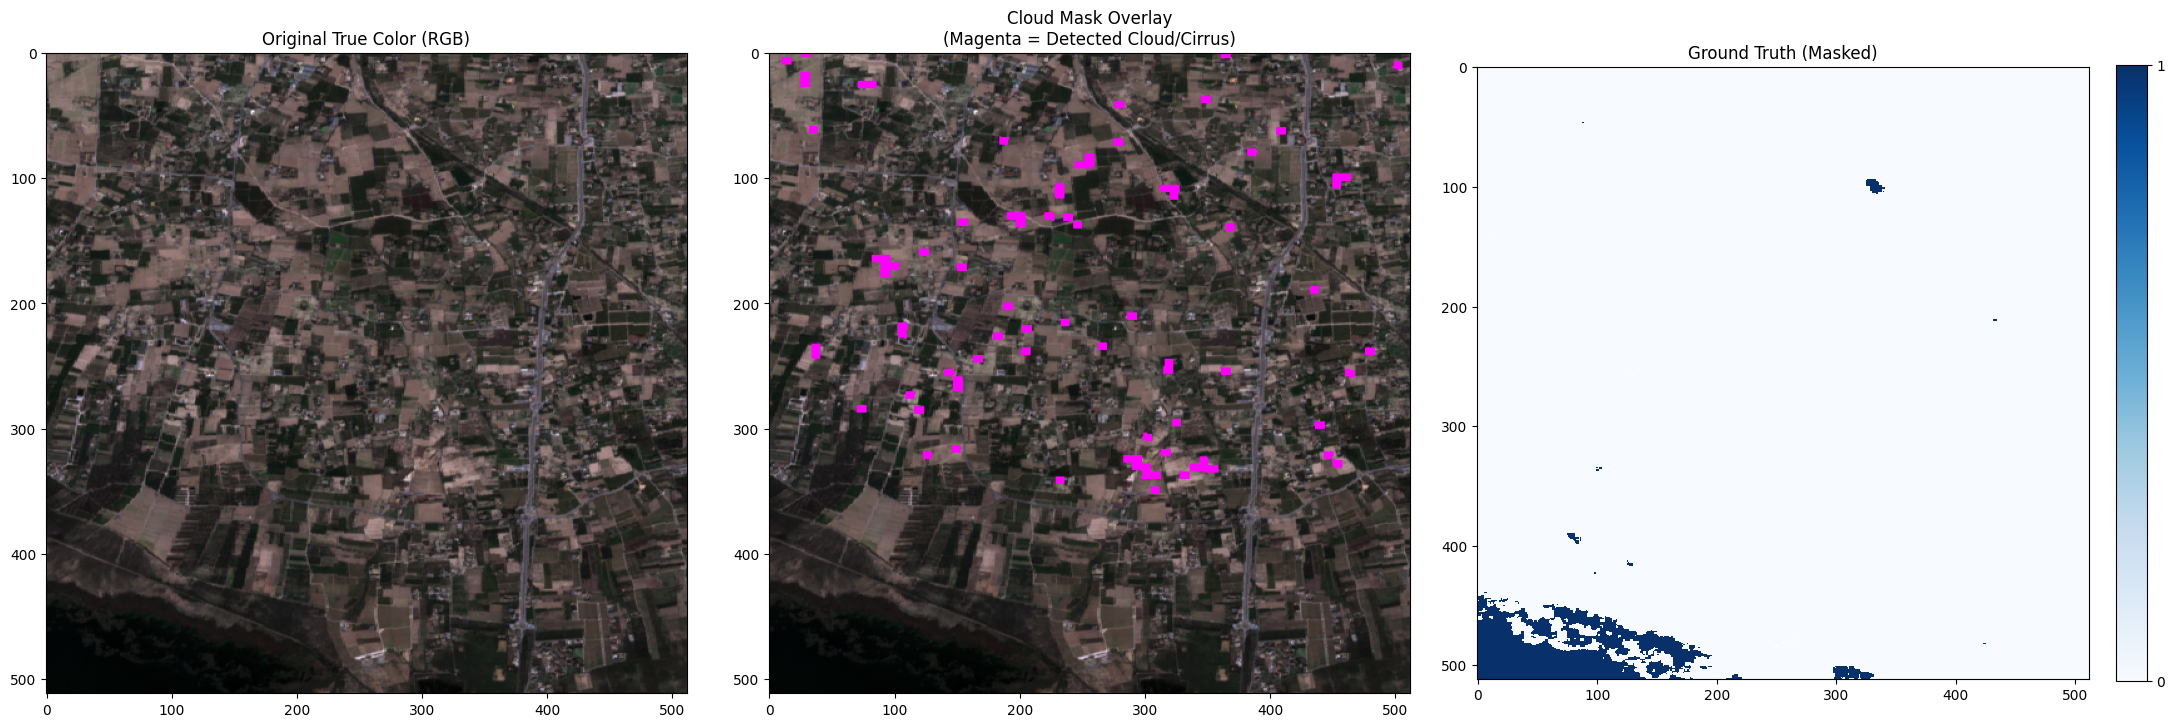

In [14]:
def visualize_with_cloud_mask(s2_dir, label_dir):
    s2_files = [f for f in os.listdir(s2_dir) if f.endswith('.tif')]
    filename = random.choice(s2_files)
    label_filename = filename.replace('_S2Hand', '_LabelHand')

    with rasterio.open(os.path.join(s2_dir, filename)) as src:
        # Band indices (1-indexed for rasterio):
        # 1:B1, 2:B2, 3:B3, 4:B4, 5:B5, 6:B6, 7:B7, 8:B8, 9:B8A, 10:B9, 11:B10, 12:B11, 13:B12
        rgb = src.read([4, 3, 2])
        b10 = src.read(11) # Band 10 is often used for cloud detection

    with rasterio.open(os.path.join(label_dir, label_filename)) as src_lbl:
        label_img = src_lbl.read(1)

    # 1. Label Masking: Handle "No Data" (-1)
    label_masked = np.ma.masked_where(label_img == -1, label_img)

    # 2. Simple Cloud Masking
    # We use a threshold on Band 10 or high reflectance across visible bands
    # This is a heuristic: high values in the cirrus band indicate clouds
    cloud_threshold = np.percentile(b10, 95)
    cloud_mask = b10 > cloud_threshold

    # 3. Apply Mask to RGB for display
    # We'll create a version where clouds are highlighted in magenta
    masked_rgb = np.transpose(rgb, (1, 2, 0)).astype(float)
    # Normalize for display
    for i in range(3):
        masked_rgb[:,:,i] = (masked_rgb[:,:,i] - masked_rgb[:,:,i].min()) / (masked_rgb[:,:,i].max() - masked_rgb[:,:,i].min())

    # Visualizing the cloud mask overlay
    overlay_rgb = masked_rgb.copy()
    overlay_rgb[cloud_mask] = [1, 0, 1] # Turn cloud pixels magenta

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 7))

    ax1.imshow(masked_rgb)
    ax1.set_title("Original True Color (RGB)")

    ax2.imshow(overlay_rgb)
    ax2.set_title("Cloud Mask Overlay\n(Magenta = Detected Cloud/Cirrus)")

    im3 = ax3.imshow(label_masked, cmap='Blues', interpolation='nearest')
    ax3.set_title("Ground Truth (Masked)")
    plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04, ticks=[0, 1])

    plt.tight_layout()
    plt.show()

visualize_with_cloud_mask(s2_path, lbl_path)

In [15]:
import numpy as np
def extract_spectral_features(file_path):
    with rasterio.open(file_path) as src:
        # Extracting specific bands based on standard Sen1Floods11 indexing
        # List: [Blue, Green, Red, Narrow NIR (8A), SWIR 1, SWIR 2]
        band_indices = [2, 3, 4, 9, 11, 12]

        features = []
        for idx in band_indices:
            band_data = src.read(idx)
            features.append(band_data)

        # Stack into a 3D array (Channels, Height, Width)
        feature_stack = np.stack(features)

    return feature_stack

# Example usage:
sample_file = os.path.join(s2_path, random.choice(os.listdir(s2_path)))
data_stack = extract_spectral_features(sample_file)

print(f"Feature Stack Shape: {data_stack.shape}") # Should be (6, 512, 512)

Feature Stack Shape: (6, 512, 512)


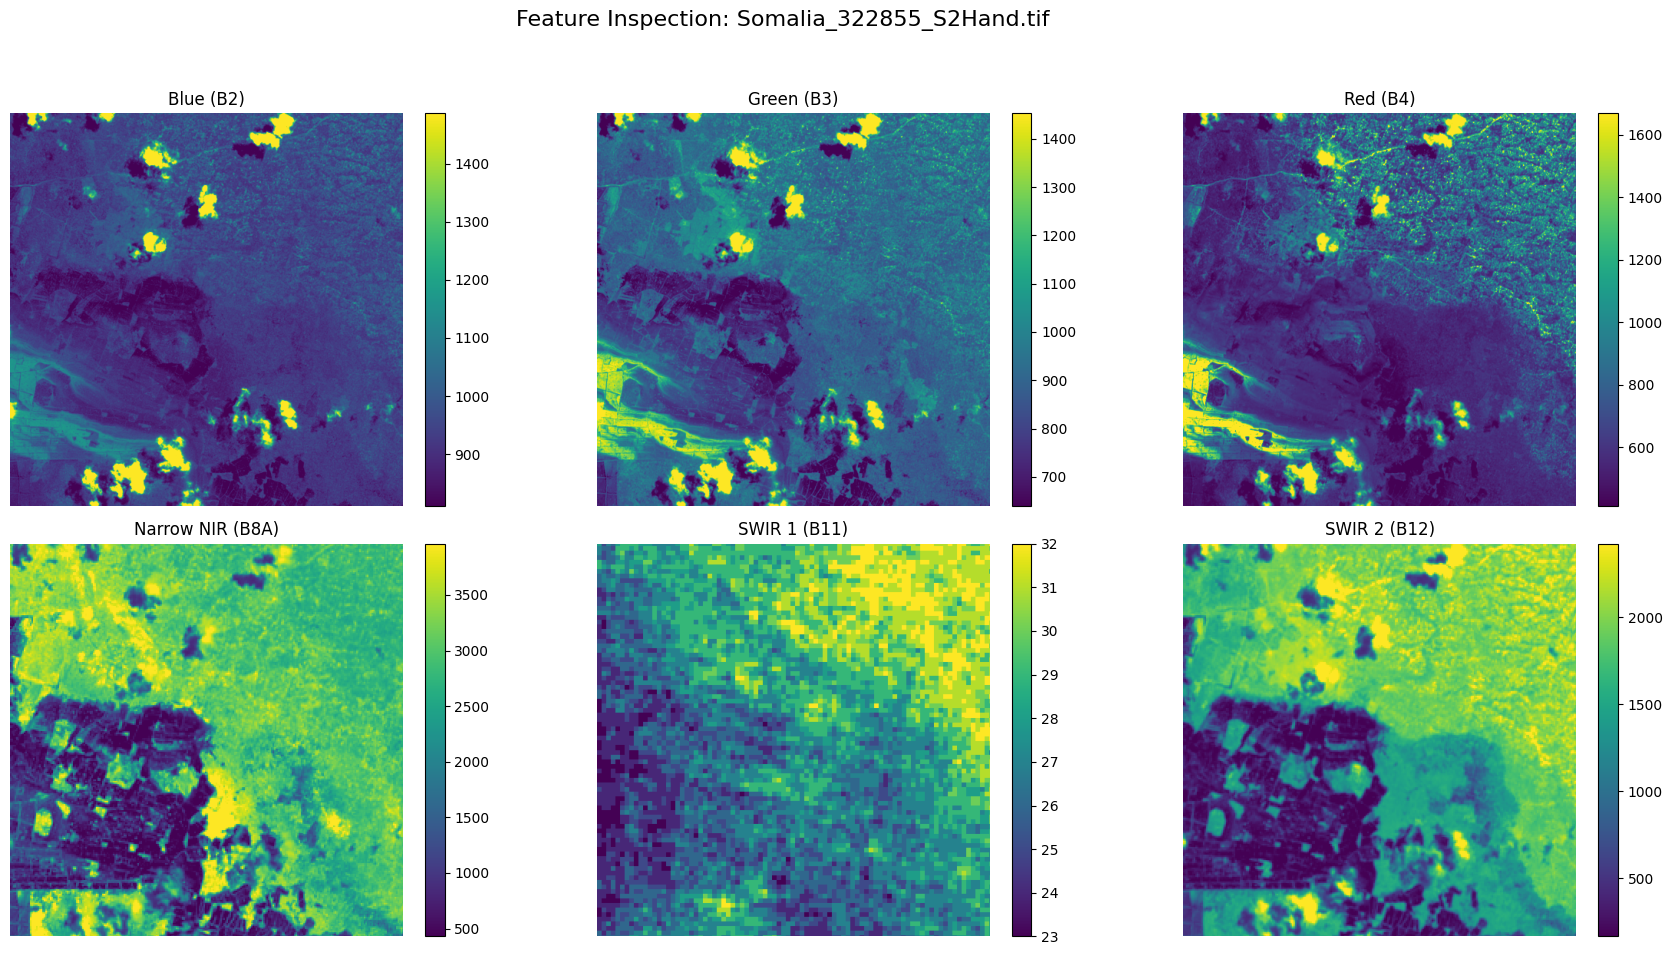

In [16]:
def inspect_feature_stack(feature_stack, filename):
    band_names = ['Blue (B2)', 'Green (B3)', 'Red (B4)', 'Narrow NIR (B8A)', 'SWIR 1 (B11)', 'SWIR 2 (B12)']

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i in range(feature_stack.shape[0]):
        band_data = feature_stack[i]

        # Robust scaling for visualization (2nd to 98th percentile)
        vmin, vmax = np.percentile(band_data, [2, 98])

        im = axes[i].imshow(band_data, cmap='viridis', vmin=vmin, vmax=vmax)
        axes[i].set_title(band_names[i])
        axes[i].axis('off')
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.suptitle(f"Feature Inspection: {filename}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Execution ---
# 1. Pick a file
sample_name = random.choice(os.listdir(s2_path))
sample_path = os.path.join(s2_path, sample_name)

# 2. Extract using our previous function
my_features = extract_spectral_features(sample_path)

# 3. Inspect
inspect_feature_stack(my_features, sample_name)

In [17]:
def extract_clean_features(s2_path, label_path):
    # Indices for Blue, Green, Red, Narrow NIR, SWIR1, SWIR2
    target_indices = [2, 3, 4, 9, 11, 12]

    with rasterio.open(s2_path) as src:
        # Read only the 6 required bands
        # Shape will be (6, 512, 512)
        img = src.read(target_indices).astype('float32')

        # Normalize: Sentinel-2 data is usually scaled by 10,000
        # We clip to 10,000 and divide to get a 0-1 reflectance range
        img = np.clip(img, 0, 10000) / 10000.0

    with rasterio.open(label_path) as src_lbl:
        label = src_lbl.read(1)
        # Encode -1 as 255 for the model's ignore_index
        label[label == -1] = 255

    return img, label.astype('uint8')

In [18]:
def extract_normalized_sample(img_file, label_file):
    """
    Reads Sentinel-2 imagery and masks, performs min-max scaling
    based on standard reflectance values, and prepares for ML.
    """
    with rasterio.open(img_file) as src:
        # Read all bands (usually 13 for S2)
        img = src.read().astype(np.float32)

    with rasterio.open(label_file) as src_lbl:
        mask = src_lbl.read(1)

    # Normalization: Sentinel-2 Level-1C/2A data is typically scaled by 10,000.
    # We clip at 1.0 (10000 / 10000) to remove specular highlights or artifacts.
    img = np.clip(img / 10000.0, 0.0, 1.0)

    # Transpose to (Height, Width, Channels) for compatibility with
    # standard Computer Vision libraries (TensorFlow, OpenCV, etc.)
    img = np.transpose(img, (1, 2, 0))

    return img, mask

In [19]:

# Create output directory
processed_dir = "/content/processed_data"
os.makedirs(processed_dir, exist_ok=True)

# Get all images
s2_images = sorted(glob.glob('/content/data/flood_events/HandLabeled/S2Hand/*.tif'))

for img_file in s2_images:
    # Construct label path
    label_file = img_file.replace('S2Hand', 'LabelHand').replace('_S2Hand', '_LabelHand')

    if os.path.exists(label_file):
        # Extract features
        x, y = extract_clean_features(img_file, label_file)

        # Save as a compressed numpy file
        base_name = os.path.basename(img_file).replace('.tif', '')
        np.savez_compressed(f"{processed_dir}/{base_name}.npz", image=x, mask=y)

print(f"Extraction complete. {len(os.listdir(processed_dir))} cubes saved.")

Extraction complete. 446 cubes saved.


In [20]:
from tqdm import tqdm
processed_dir = "/content/processed_data"
os.makedirs(processed_dir, exist_ok=True)

# 2. Identify Files
s2_images = sorted(glob.glob('/content/data/flood_events/HandLabeled/S2Hand/*.tif'))

print(f"Found {len(s2_images)} images. Starting normalization...")

# 3. Processing Loop
for img_file in tqdm(s2_images):
    # Construct corresponding label path
    label_file = img_file.replace('S2Hand', 'LabelHand').replace('_S2Hand', '_LabelHand')

    if os.path.exists(label_file):
        # Use our newly named normalization function
        # Returns: x (H, W, C) and y (H, W)
        x, y = extract_normalized_sample(img_file, label_file)

        # Prepare the filename (removing .tif extension)
        base_name = os.path.basename(img_file).replace('.tif', '')
        save_path = os.path.join(processed_dir, f"{base_name}.npz")

        # Save as a compressed numpy file to save disk space
        np.savez_compressed(save_path, image=x, mask=y)
    else:
        print(f"\n Missing label for: {os.path.basename(img_file)}")

print(f"\n Extraction complete. {len(os.listdir(processed_dir))} normalized cubes saved to {processed_dir}.")

Found 446 images. Starting normalization...


100%|██████████| 446/446 [03:29<00:00,  2.13it/s]


 Extraction complete. 446 normalized cubes saved to /content/processed_data.


In [21]:
import numpy as np

# Load one processed file
sample_file = os.path.join(processed_dir, os.listdir(processed_dir)[0])
with np.load(sample_file) as data:
    img = data['image']
    mask = data['mask']

print(f"File: {os.path.basename(sample_file)}")
print(f"Image Shape: {img.shape}") # Should be (H, W, 13) or (H, W, 6)
print(f"Pixel Range: {img.min()} to {img.max()}") # Should be 0.0 to 1.0
print(f"Mask unique values: {np.unique(mask)}") # Should be [0, 1] (and potentially 255 or -1)

File: India_900498_S2Hand.npz
Image Shape: (512, 512, 13)
Pixel Range: 0.0003000000142492354 to 0.4449999928474426
Mask unique values: [-1  0  1]


In [22]:
def extract_normalized_6band(img_file, label_file):
    # Mapping indices for Sen1Floods11 S2Hand:
    # 1=Blue, 2=Green, 3=Red, 8=Narrow NIR (B8A), 11=SWIR1, 12=SWIR2
    target_indices = [1, 2, 3, 8, 11, 12]

    with rasterio.open(img_file) as src:
        # rasterio.read() uses 1-based indexing
        # This will read specifically bands 2, 3, 4, 9, 12, 13 from the file
        img = src.read([i + 1 for i in target_indices]).astype(np.float32)
        img = np.clip(img / 10000.0, 0, 1)
        img = np.transpose(img, (1, 2, 0)) # To (H, W, 6)

    with rasterio.open(label_file) as src_lbl:
        mask = src_lbl.read(1)
        # Standardize 'No Data': convert -1 to 255 for the model ignore_index
        mask_cleaned = mask.copy()
        mask_cleaned[mask == -1] = 255

    return img, mask_cleaned.astype('uint8')

In [23]:
import os
import glob
import numpy as np
from tqdm import tqdm

processed_dir = "/content/processed_data"
os.makedirs(processed_dir, exist_ok=True)

s2_images = sorted(glob.glob('/content/data/flood_events/HandLabeled/S2Hand/*.tif'))

print(f"Re-processing {len(s2_images)} files to 6-band format...")

for img_file in tqdm(s2_images):
    label_file = img_file.replace('S2Hand', 'LabelHand').replace('_S2Hand', '_LabelHand')

    if os.path.exists(label_file):
        # Extract the 6 bands and cleaned mask
        x, y = extract_normalized_6band(img_file, label_file)

        base_name = os.path.basename(img_file).replace('.tif', '')
        # Save as compressed .npz
        np.savez_compressed(f"{processed_dir}/{base_name}.npz", image=x, mask=y)

print(f"Success! {len(os.listdir(processed_dir))} 6-band cubes saved.")

Re-processing 446 files to 6-band format...


100%|██████████| 446/446 [01:55<00:00,  3.86it/s]

Success! 446 6-band cubes saved.


In [24]:
sample_path = os.path.join(processed_dir, os.listdir(processed_dir)[0])
with np.load(sample_path) as data:
    print(f"New Image Shape: {data['image'].shape}") # Should be (512, 512, 6)
    print(f"Mask Unique Values: {np.unique(data['mask'])}") # Should be [0, 1, 255]

New Image Shape: (512, 512, 6)
Mask Unique Values: [  0   1 255]
